# Assignment 3_Non Parametric tests I

BACKGROUND: In a randomized control trial, 32 patients were divided into two groups: A and B. Group A received test drug whereas group B received placebo. The variable of interest was Numerical Pain Rating Scale (NPRS) before treatment and after 3 days of treatment. (Higher number indicates more pain)


QUESTIONS-

1. Import NPRS DATA and name it as pain_nprs. Find median NPRS before and after treatment.
2. Is post treatment NPRS score significantly less as compared to ‘before treatment’ NPRS score for Group A?
3. Is post treatment NPRS score significantly less as compared to ‘before treatment’ NPRS score for Group B?
4. Is the change in NPRS for group ‘A’ significantly different than group ‘B’? 5. Present change in NPRS for each group using box-whisker plot.

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data
pain_nprs = pd.read_csv("/content/NPRS DATA.csv")

# median NPRS before and after treatment
median_before = pain_nprs['NPRS_before'].median()
median_after = pain_nprs['NPRS_after'].median()

print(f"Median NPRS before treatment: {median_before}")
print(f"Median NPRS after treatment: {median_after}")

Median NPRS before treatment: 7.0
Median NPRS after treatment: 5.0


In [ ]:
# Statistical Test for Group A
group_a = pain_nprs[pain_nprs['Group'] == 'A']
t_test_a = stats.ttest_rel(group_a['NPRS_after'], group_a['NPRS_before'])
print("Paired T-test for Group A:", t_test_a)

Paired T-test for Group A: TtestResult(statistic=0.48138057123038197, pvalue=0.6371931057384982, df=15)


The p-value of 0.637 is significantly higher than the common alpha level of
0.05 . This indicates that there is no statistically significant difference between the pre-treatment and post-treatment NPRS scores for Group A. In other words the test drug to Group A did not result in a statistically significant reduction in pain.

In [ ]:
# Statistical Test for Group B
group_b = pain_nprs[pain_nprs['Group'] == 'B']
t_test_b = stats.ttest_rel(group_b['NPRS_after'], group_b['NPRS_before'])
print("Paired T-test for Group B:", t_test_b)

Paired T-test for Group B: TtestResult(statistic=-7.766196464897134, pvalue=1.2383806470717302e-06, df=15)


The p-value of approximately is extremely small.  This indicates that there is a statistically significant difference in NPRS scores between the pre-treatment and post-treatment for Group B.

This suggests that the placebo had a strong effect, or that there may have been a natural reduction in pain over the three days.

In [ ]:
# Calculate change in NPRS
pain_nprs['Change'] = pain_nprs['NPRS_after'] - pain_nprs['NPRS_before']

# Independent t-test
t_test_change = stats.ttest_ind(pain_nprs[pain_nprs['Group'] == 'A']['Change'],
                                 pain_nprs[pain_nprs['Group'] == 'B']['Change'])


print("Independent T-test for Change between Groups A and B:", t_test_change)


Independent T-test for Change between Groups A and B: TtestResult(statistic=0.9937807261564382, pvalue=0.32827811356761083, df=30.0)


The p-value is much higher than 0.05. This indicates that there is no significant difference in the changes in NPRS scores between Group A (test drug) and Group B (placebo). In other words, the changes in pain levels observed in both groups are statistically similar.

The lack of a significant difference in pain changes suggests that the test drug may not have a clinically meaningful effect compared to the placebo in this trial.

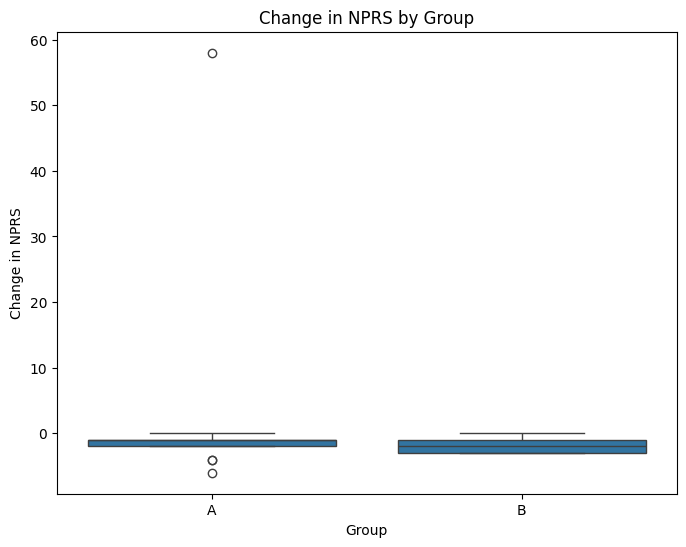

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# box-whisker plot for change in NPRS
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Change', data=pain_nprs)
plt.title('Change in NPRS by Group')
plt.xlabel('Group')
plt.ylabel('Change in NPRS')
plt.show()
